In [0]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os


test set: https://forums.fast.ai/t/how-to-add-a-test-set/38956/7
text.data reference methods: https://docs.fast.ai/text.html

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/clillianhong/experiment/master/scripts/data/type_data/type_features_produce.csv")

In [0]:
df = pd.DataFrame({'label':data.label, 'text':data.text})

In [0]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#tokenization 
tokenized_doc = df['text'].apply(lambda x: x.split())

#remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


KeyboardInterrupt: ignored

In [0]:

detokenized_doc = []
for i in range(len(df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
df['text'] = detokenized_doc

In [137]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn_l, df_val_l = train_test_split(df, stratify = df['label'], test_size = 0.1, random_state = 12)
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.3, random_state = 12)

df_trn.shape, df_val.shape

((1726, 2), (741, 2))

In [0]:
#language model data - vectorization 
data_lm = TextLMDataBunch.from_df(train_df=df_trn_l, valid_df=df_val_l, path = "") #potentially change to use all of the data 

# Classifier model data - 
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)


In [0]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.5)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


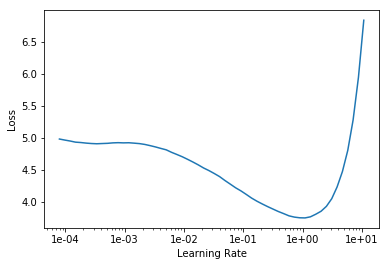

In [140]:
learn.lr_find(start_lr=1e-5, end_lr=10000)
learn.recorder.plot()

In [141]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.891424,2.191407,0.602827,00:08


In [142]:
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3, moms=(0.8,0.7)) #decrease learning rate by a factor of 10? why? 

epoch,train_loss,valid_loss,accuracy,time
0,1.855586,1.706807,0.670833,00:11
1,1.521345,1.584065,0.695201,00:12


In [0]:
learn.save_encoder('ft_enc_best')

In [77]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
learn = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc_best')
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


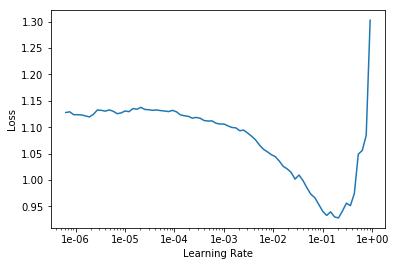

In [145]:
learn.lr_find()
learn.recorder.plot()

In [146]:
learn1 = learn
learn1.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))
learn1.save('clas_first') 


epoch,train_loss,valid_loss,accuracy,time
0,0.926997,0.684264,0.748988,00:05


In [147]:
learn1.freeze_to(-2)
learn1.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))  #decrease learning rate by a factor of 10? 
learn1.save('clas_first_1')

epoch,train_loss,valid_loss,accuracy,time
0,0.789563,0.569957,0.816464,00:07


In [148]:
learn1.freeze_to(-3)
learn1.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))  #decrease learning rate to middle of spike down? (factor of 10?)
learn1.save('clas_first_2')


epoch,train_loss,valid_loss,accuracy,time
0,0.700105,0.493893,0.819163,00:11


In [133]:
learn1.unfreeze()
learn1.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))  #decrease lr slightly further

epoch,train_loss,valid_loss,accuracy,time
0,0.220779,0.266231,0.901582,00:32


In [0]:
learn1.export('/content/gdrive/My Drive/type_produce_classifier.pkl')

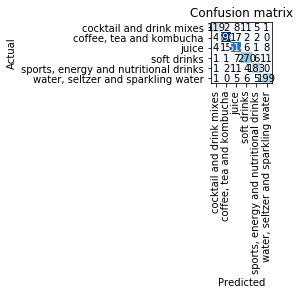

In [24]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

RNNLearner(data=TextClasDataBunch;

Train: LabelList (0 items)
x: TextList

y: CategoryList

Path: .;

Valid: LabelList (0 items)
x: TextList

y: CategoryList

Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(19072, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(19072, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, 

In [0]:
print(learn1)

RNNLearner(data=TextClasDataBunch;

Train: LabelList (33922 items)
x: TextList
xxbos xxmaj when xxmaj pigs xxmaj fly xxmaj special xxmaj bread xxmaj when xxmaj pigs xxmaj fly xxmaj special xxmaj bread xxmaj when xxmaj pigs xxmaj fly xxmaj special xxmaj bread xxmaj when xxmaj pigs xxmaj fly xxmaj special xxmaj bread xxmaj when xxmaj pigs xxmaj fly xxmaj special xxmaj bread xxmaj when xxmaj pigs xxmaj fly xxmaj special xxmaj bread unbleached flour , sesame seeds , poppy seeds , sunflower seeds , ( cracked wheat , cracked rye , cracked barley , steel cut oats , corn grits , millet , flax seeds ) , cider , barley malt , salt and yeast contains statement wheat , corn unbleached flour , sesame seeds , poppy seeds , sunflower seeds , ( cracked wheat , cracked rye , cracked barley , steel cut oats , corn grits , millet , flax seeds ) , cider , barley malt , salt and yeast contains statement wheat , corn breads & bakery breads & bakery breads & bakery breads & bakery,xxbos xxmaj lundberg xxmaj 

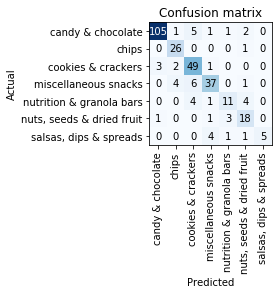

In [0]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [0]:
learn1.fit_one_cycle(1, 5e-3, moms=(0.8,0.7)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.332663,0.654988,0.839465,01:34


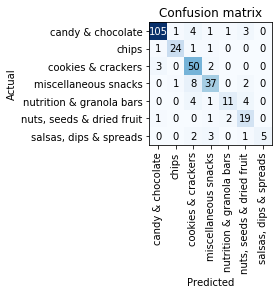

In [0]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

RuntimeError: Error(s) in loading state_dict for SequentialRNN:
	size mismatch for 0.module.encoder.weight: copying a param with shape torch.Size([544, 400]) from checkpoint, the shape in current model is torch.Size([1057, 400]).
	size mismatch for 0.module.encoder_dp.emb.weight: copying a param with shape torch.Size([544, 400]) from checkpoint, the shape in current model is torch.Size([1057, 400]).

In [0]:
learn1.predict("Planters Salted Caramel Nuts - 5oz")

(Category nuts, seeds & dried fruit,
 tensor(5),
 tensor([4.6762e-03, 2.3689e-04, 4.7700e-04, 6.5982e-03, 4.9677e-03, 9.8208e-01,
         9.6855e-04]))

In [0]:
learn1.predict("Planters NUT-rition Essential Nutrients Deluxe Nut Mix - 5.5oz")

(Category nuts, seeds & dried fruit,
 tensor(5),
 tensor([8.9710e-03, 2.7897e-04, 3.2380e-03, 1.4718e-01, 1.2531e-01, 7.0443e-01,
         1.0596e-02]))

In [0]:
learn1.predict("Gummi Worms - 7oz - Market Pantry™")

(Category nuts, seeds & dried fruit,
 tensor(5),
 tensor([0.1739, 0.0254, 0.0058, 0.0655, 0.0162, 0.7073, 0.0059]))

In [0]:
learn1.predict("HERSHEY'S Miniatures Party Bag Assorted Chocolate Candy Bars - 40oz")

(Category nutrition & granola bars,
 tensor(4),
 tensor([3.3130e-01, 7.0746e-05, 2.3203e-03, 7.9388e-03, 5.7535e-01, 5.4377e-02,
         2.8643e-02]))

In [0]:
learn1.predict("Dum Dums Original Assorted Flavors Lollipops - 1000ct")

(Category nuts, seeds & dried fruit,
 tensor(5),
 tensor([0.0453, 0.0019, 0.0012, 0.0167, 0.0069, 0.9247, 0.0033]))

In [0]:
learn1.predict("JOLLY RANCHER Original Flavors Hard Candies - 3.75lbs")

(Category nutrition & granola bars,
 tensor(4),
 tensor([0.0149, 0.0013, 0.0215, 0.2464, 0.4558, 0.2235, 0.0366]))

In [0]:
learn1.predict("Almonds, Peanuts & Sea Salt with Cocoa Drizzle Nut Bars - 12ct - Simply Balanced™")

(Category nuts, seeds & dried fruit,
 tensor(5),
 tensor([0.0378, 0.0007, 0.0080, 0.0319, 0.3625, 0.5534, 0.0058]))

In [0]:
learn1.predict("Kashi Dark Mocha Almond Chewy Granola Bars - 6ct")

(Category nutrition & granola bars,
 tensor(4),
 tensor([1.7183e-04, 1.0794e-06, 2.2061e-05, 1.1894e-04, 9.9563e-01, 3.7319e-03,
         3.2741e-04]))

In [0]:
learn1.predict("Organic Roasted Restaurant Style Salsa 24oz - Simply Balanced™")

(Category nuts, seeds & dried fruit,
 tensor(5),
 tensor([1.3523e-03, 1.4159e-04, 6.9513e-04, 9.4070e-03, 1.7058e-02, 9.7002e-01,
         1.3279e-03]))

In [0]:
learn1.predict("Pace® Mild Chunky Salsa 64 oz")

(Category nuts, seeds & dried fruit,
 tensor(5),
 tensor([0.1862, 0.0009, 0.0087, 0.1716, 0.1587, 0.4428, 0.0312]))

In [0]:
learn1.predict("Pepperidge Farm® Pirouette® Crème Filled Wafers Chocolate Hazelnut Cookies, 13.5oz Tin")

(Category candy & chocolate,
 tensor(0),
 tensor([0.5642, 0.0133, 0.0664, 0.1514, 0.0623, 0.1347, 0.0076]))

In [0]:
learn1.predict("Milkmakers Oatmeal Chocolate Chip Cookies - 10ct")

(Category candy & chocolate,
 tensor(0),
 tensor([0.6976, 0.0066, 0.0829, 0.0211, 0.1131, 0.0689, 0.0098]))

In [0]:
learn1.predict("Skinny Pop Popcorn 100 Calorie Bags - 24ct")

(Category miscellaneous snacks,
 tensor(3),
 tensor([0.0062, 0.0109, 0.0087, 0.6484, 0.0675, 0.2502, 0.0082]))

Keep in mind:
    - preprocess the input data the exact same way
    - might want to hardcode, create list of edge case brands/items that can't be predicted well
    - might want to generate data for edge case subtypes
    - try weighting in the future (concatenate data within python to manage this as a hyperparameter)